<h1 align ='center'>Calculating Galaxy Distance Using Spectra </h1>

#### Authors

##### Md. Iftakhar Hossain Simanto
- **Position**: Student, Electrical & Electronic Engineering
- **Institution**: BRAC University
- **E-mail**: [simanto1234.dhk@gmail.com](mailto:simanto1234.dhk@gmail.com)

##### K M Shariat Ullah
- **Position**: Student, Electrical & Electronic Engineering  
- **Institution**: Shahjalal University of Science & Technology  
- **E-mail**: [cast.shariat@gmail.com](mailto:cast.shariat@gmail.com)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

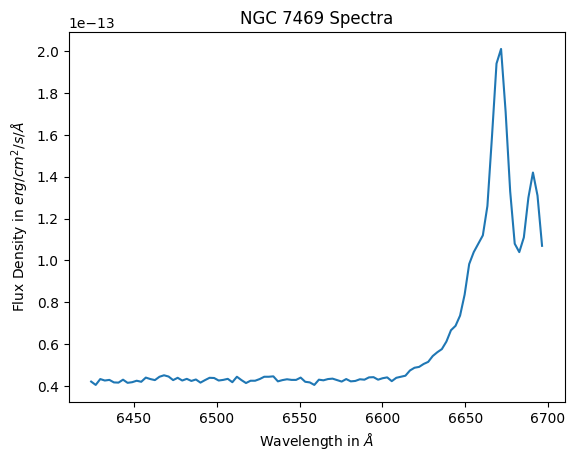

In [4]:
# load dataset
data = pd.read_csv('NGC_7469.csv')

wave = data.Wavelength[1000:1100]
intensity= data.Intensity[1000:1100]

plt.plot(wave, intensity)
plt.title('NGC 7469 Spectra')
plt.xlabel('Wavelength in $\\AA$')
plt.ylabel('Flux Density in $erg/cm^2/s/\\AA$')
plt.show()

In [6]:
# finding the H alpha line
x = find_peaks(intensity, height= 1.95e-13)

print(f"Red Shifted H Alpha Line at: {wave[1000+x[0][0]]} Angstorm with Intensity {intensity[1000+x[0][0]]}")


Red Shifted H Alpha Line at: 6671.65 Angstorm with Intensity 2.01e-13


In [9]:
wave_obs = 6671.65    #angstrom
wave_src = 6562.8     #angstrom

z = (wave_obs - wave_src)/wave_src
print(f"Redshift value of z: {z:0.6f}")

#constant 

c = 299792458
H_0 = 72              # Km/s/Mpc
d_actual = 66.47      # Mpc

#converting redshift z to velocity v

v = c * z / 1000            # km/s

print(f"Velocity of NGC 7469: {v:0.2f}")

d_spectra= v / H_0

print(f"Distance of NGC 7469: {d_spectra:0.2f}")

error = abs((d_actual-d_spectra)/d_actual * 100)

print(f"error: {error:0.2f}%")


Redshift value of z: 0.016586
Velocity of NGC 7469: 4972.33
Distance of NGC 7469: 69.06
error: 3.90%


<h1 align ='center'>Calculating Galaxy Distance Using Density Parameter </h1>

#### Authors

##### Md. Iftakhar Hossain Simanto
- **Position**: Student, Electrical & Electronic Engineering
- **Institution**: BRAC University
- **E-mail**: [simanto1234.dhk@gmail.com](mailto:simanto1234.dhk@gmail.com)

##### K M Shariat Ullah
- **Position**: Student, Electrical & Electronic Engineering  
- **Institution**: Shahjalal University of Science & Technology  
- **E-mail**: [cast.shariat@gmail.com](mailto:cast.shariat@gmail.com)


In [11]:
from scipy.integrate import quad

In [13]:
# ---------------------
#      Constants
# ---------------------
c = 299792458                # m/s                     
H_0 = 72                     # km/s/Mpc
lambda_src = 6562.8          # Rest wavelength of H beta line
lambda_obs = 6671.65         # Observed wavelength of H beta line
D_H = c / H_0                # Hubble distance in Mpc

# Updated matter density parameter (Planck 2018) 
Omega_M = 0.3142  
Omega_Lambda = 0.6858 
Omega_k = 0.001 

In [16]:
# Redshift value using wavelength
z = (lambda_obs - lambda_src) / lambda_src
print(f"Redshift Value of NGC 7469: {z:0.6f}")

# Function E(z) from cosmology resource
def E(z):
    return np.sqrt(Omega_M * (1 + z)**3 + Omega_k * (1 + z)**2 + Omega_Lambda)

# Calculate comoving distance D_C
def comoving_distance(z):
    integral, _ = quad(lambda z_prime: 1 / E(z_prime), 0, z)
    return D_H * integral

# Compute the comoving distance for 3C 273
D_C = comoving_distance(z) / 1000
print(f"Comoving Distance of NGC 7469: {D_C:.2f} Mpc")

# error 
error_advanced = abs(D_C - d_actual) / d_actual * 100
print(f"Error is: {error_advanced:0.2f}%")


Redshift Value of NGC 7469: 0.016586
Comoving Distance of NGC 7469: 68.75 Mpc
Error is: 3.44%
